In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context="paper",style="whitegrid",font="Georgia",font_scale=1.2)

In [66]:
df = pd.read_csv("bank_data.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [67]:
df.isnull().sum() # we understood that we don't have any null value.

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [68]:
df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [69]:
for i in ["credit_card","active_member","products_number"]:
    print(df[i].value_counts())

credit_card
1    7055
0    2945
Name: count, dtype: int64
active_member
1    5151
0    4849
Name: count, dtype: int64
products_number
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64


In [70]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [71]:
for i in ["credit_card","active_member","products_number"]:
    df[i] = df[i].astype("object")

In [72]:
df.drop("customer_id",inplace=True,axis=1)

In [73]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


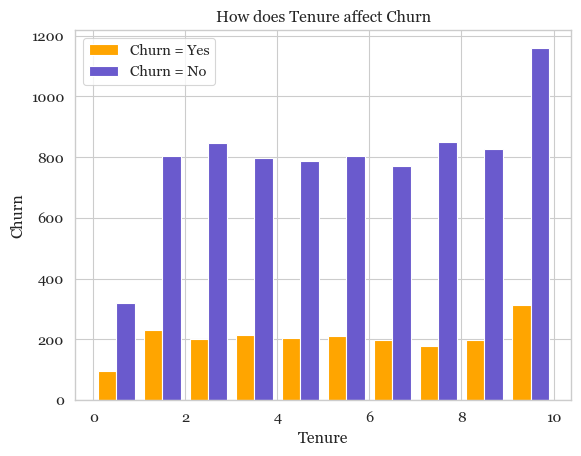

In [74]:
tenure_yes = df[df["churn"]==1].tenure
tenure_no = df[df["churn"]==0].tenure

plt.hist([tenure_yes,tenure_no],color=["orange","slateblue"], label=['Churn = Yes','Churn = No'])
plt.legend()
plt.title("How does Tenure affect Churn")
plt.xlabel("Tenure")
plt.ylabel("Churn")
plt.show()

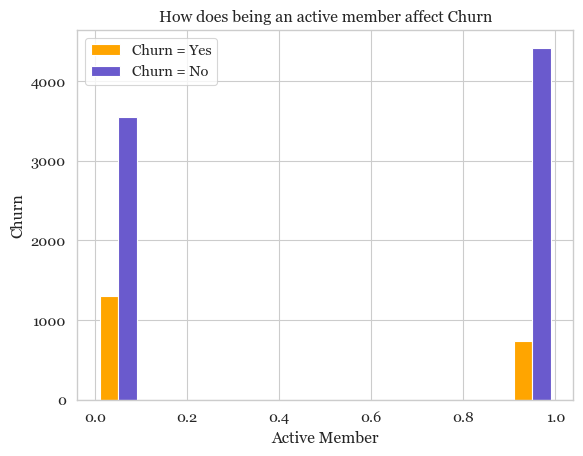

In [75]:
member_yes = df[df["churn"]==1].active_member
member_no = df[df["churn"]==0].active_member

plt.hist([member_yes, member_no],color = ["orange","slateblue"], label = ["Churn = Yes","Churn = No"])
plt.legend()
plt.title("How does being an active member affect Churn")
plt.xlabel("Active Member")
plt.ylabel("Churn")
plt.show()

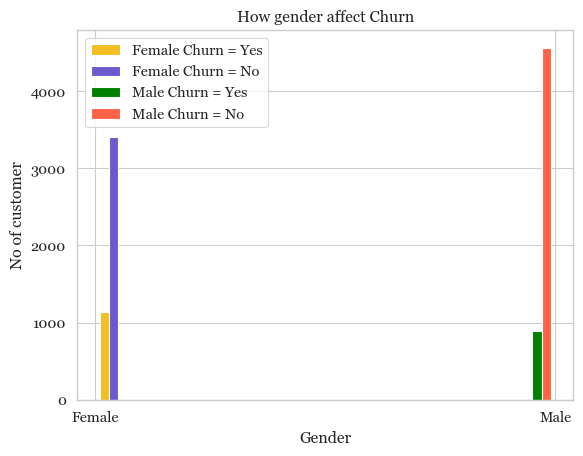

In [76]:
#how does gender affect churn
female = df[df["gender"] == "Female"]
male = df[df["gender"] == "Male"]
female_yes = female[female["churn"]==1].gender
female_no = female[female["churn"]==0].gender
male_yes = male[male["churn"]==1].gender
male_no = male[male["churn"]==0].gender

plt.hist([female_yes,female_no,male_yes,male_no],
          color = ["#F2BE22","slateblue","green","tomato"],
          label=["Female Churn = Yes","Female Churn = No","Male Churn = Yes","Male Churn = No"])
plt.legend()
plt.title("How gender affect Churn")
plt.xlabel("Gender")
plt.ylabel("No of customer")
plt.show()


In [77]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [78]:
#Examining (inceleme) country column
df["country"].value_counts()

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [79]:
#--One-Hot Encoding categorical column
df = pd.get_dummies(df,columns=["country","gender"],dtype=int)
df.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
